<a href="https://colab.research.google.com/github/lauramazzu/hackbio-biocoding-internship/blob/main/hackbio_task_code_2_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

**Public Health**

NHANES is a program run by the CDC to assess the health and nutritional status of adults and children in the US. It combines survey questions and physical examinations, including medical and physiological measurements and laboratory tests, and examines a representative sample of about 5,000 people each year. The data is used to determine the prevalence of diseases and risk factors, establish national standards, and support epidemiology studies and health sciences research. This information helps to develop public health policy, design health programs and services, and expand the nation's health knowledge.

Dataset here

Data Dictionary


**Tasks**

Process all NA (either by deleting or by converting to zero) {Hard :fire:}

Visualize the distribution of BMI, Weight, Weight in pounds (weight *2.2) and Age with an histogram.

What’s the mean 60-second pulse rate for all participants in the data?
73.63382

What’s the range of values for diastolic blood pressure in all participants? (Hint: see help for min(), max()).
0-116

What’s the variance and standard deviation for income among all participants?
Visualize the relationship between weight and height ?

Color the points by

gender
diabetes
smoking status

Conduct t-test between the following variables and make conclusions on the relationship between them based on P-Value

Age and Gender

BMI and Diabetes

Alcohol Year and Relationship Status

In [ ]:
link_url = "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/nhanes.csv"

df = pd.read_csv(link_url) #sep = ",", engine = "python")
df

,id,Gender,Age,Race,Education,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,...,Diabetes,DiabetesAge,nPregnancies,nBabies,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear,SmokingStatus
0,62163,male,14,Asian,NaN,NaN,NaN,Yes,100000.0,4.07,...,No,NaN,NaN,NaN,NaN,No,1.0,NaN,NaN,NaN
1,62172,female,43,Black,High School,NeverMarried,Single,Yes,22500.0,2.02,...,No,NaN,3.0,2.0,8.0,No,2.0,3.0,104.0,Current
2,62174,male,80,White,College Grad,Married,Committed,Yes,70000.0,4.30,...,No,NaN,NaN,NaN,9.0,No,7.0,NaN,0.0,Never
3,62174,male,80,White,College Grad,Married,Committed,Yes,70000.0,4.30,...,No,NaN,NaN,NaN,9.0,No,5.0,NaN,0.0,Never
4,62175,male,5,White,NaN,NaN,NaN,Yes,12500.0,0.39,...,No,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71909,male,28,Mexican,9 - 11th Grade,NeverMarried,Single,No,7500.0,0.46,...,No,NaN,NaN,NaN,6.0,Yes,NaN,NaN,NaN,Current
4996,71910,female,0,White,NaN,NaN,NaN,Yes,87500.0,3.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,71911,male,27,Mexican,College Grad,Married,Committed,Yes,87500.0,3.25,...,No,NaN,NaN,NaN,6.0,No,3.0,5.0,4.0,Never
4998,71915,male,60,White,College Grad,NeverMarried,Single,Yes,70000.0,5.00,...,Yes,56.0,NaN,NaN,6.0,No,1.0,NaN,0.0,Never


In [ ]:
df.shape

(5000, 32)

In [ ]:
#Are there any NaN values in the dataset?
df.isna().values.any()

True

In [ ]:
print(df.isna().sum())
df.isna()
#as we can see below, almost all the columns apart from Age and Race, have NaN values.

id                       0
Gender                   0
Age                      0
Race                     0
Education             1416
MaritalStatus         1415
RelationshipStatus    1415
Insured                  7
Income                 377
Poverty                325
HomeRooms               28
HomeOwn                 28
Work                  1158
Weight                  31
Height                 159
BMI                    166
Pulse                  718
BPSys                  719
BPDia                  719
Testosterone           874
HDLChol                775
TotChol                775
Diabetes                64
DiabetesAge           4693
nPregnancies          3735
nBabies               3832
SleepHrsNight         1166
PhysActive             850
PhysActiveDays        2614
AlcoholDay            2503
AlcoholYear           2016
SmokingStatus         1413
dtype: int64


,id,Gender,Age,Race,Education,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,...,Diabetes,DiabetesAge,nPregnancies,nBabies,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear,SmokingStatus
0,False,False,False,False,True,True,True,False,False,False,...,False,True,True,True,True,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,True,False,False
4,False,False,False,False,True,True,True,False,False,False,...,False,True,True,True,True,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,True,True,True,False
4996,False,False,False,False,True,True,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4997,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,False,True,False,False


In [ ]:
# I decide to eliminate the columns nPregnancies, nbabies, education, work and age of diabete because these columns are not needed for my current analysis and they have a lot of NaN values.
df.drop(columns= ["nPregnancies", "nBabies", "Education", "Work", "DiabetesAge"], inplace = True)
df

,id,Gender,Age,Race,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,HomeRooms,...,Testosterone,HDLChol,TotChol,Diabetes,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear,SmokingStatus
0,62163,male,14,Asian,NaN,NaN,Yes,100000.0,4.07,6.0,...,274.95,1.14,3.98,No,NaN,No,1.0,NaN,NaN,NaN
1,62172,female,43,Black,NeverMarried,Single,Yes,22500.0,2.02,4.0,...,47.53,1.89,4.37,No,8.0,No,2.0,3.0,104.0,Current
2,62174,male,80,White,Married,Committed,Yes,70000.0,4.30,7.0,...,642.82,1.40,5.25,No,9.0,No,7.0,NaN,0.0,Never
3,62174,male,80,White,Married,Committed,Yes,70000.0,4.30,7.0,...,642.82,1.40,5.25,No,9.0,No,5.0,NaN,0.0,Never
4,62175,male,5,White,NaN,NaN,Yes,12500.0,0.39,7.0,...,NaN,NaN,NaN,No,NaN,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71909,male,28,Mexican,NeverMarried,Single,No,7500.0,0.46,3.0,...,490.43,1.22,3.90,No,6.0,Yes,NaN,NaN,NaN,Current
4996,71910,female,0,White,NaN,NaN,Yes,87500.0,3.37,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4997,71911,male,27,Mexican,Married,Committed,Yes,87500.0,3.25,10.0,...,509.00,1.06,5.72,No,6.0,No,3.0,5.0,4.0,Never
4998,71915,male,60,White,NeverMarried,Single,Yes,70000.0,5.00,4.0,...,505.13,0.93,4.94,Yes,6.0,No,1.0,NaN,0.0,Never


In [ ]:
#dropping all the NaN values
df_with_dropna_ = df.dropna()

#df.isna().values.any()
#if I delete all NaN and keep the columns, only 17 raws remains, but by eliminating those 5 columns I have 971 rows, which is already better. Anyways, I decide to create a second dataframe with 5000 rows and add a value of 0. Depending on the type of analysis I will use either of those. If the NaN values are less
#than 10% of the total dataset for a specific column, I use the df with 0 values, otherwise I use the df with dropped values.
df_with_dropna_

,id,Gender,Age,Race,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,HomeRooms,...,Testosterone,HDLChol,TotChol,Diabetes,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear,SmokingStatus
1,62172,female,43,Black,NeverMarried,Single,Yes,22500.0,2.02,4.0,...,47.53,1.89,4.37,No,8.0,No,2.0,3.0,104.0,Current
5,62176,female,34,White,Married,Committed,Yes,100000.0,5.00,8.0,...,21.11,1.42,4.42,No,7.0,Yes,5.0,2.0,104.0,Never
10,62199,male,57,White,LivePartner,Committed,Yes,100000.0,5.00,4.0,...,269.24,0.91,4.42,No,8.0,Yes,2.0,1.0,260.0,Former
12,62199,male,57,White,LivePartner,Committed,Yes,100000.0,5.00,4.0,...,269.24,0.91,4.42,No,8.0,Yes,7.0,1.0,260.0,Former
17,62205,male,28,White,NeverMarried,Single,Yes,100000.0,5.00,12.0,...,466.11,1.03,5.46,No,6.0,Yes,1.0,3.0,52.0,Never
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,71868,male,43,Mexican,Married,Committed,Yes,60000.0,2.46,7.0,...,291.00,1.22,4.42,No,6.0,No,5.0,5.0,4.0,Former
4977,71868,male,43,Mexican,Married,Committed,Yes,60000.0,2.46,7.0,...,291.00,1.22,4.42,No,6.0,No,4.0,5.0,4.0,Former
4982,71873,female,20,White,LivePartner,Committed,Yes,50000.0,2.69,6.0,...,39.07,1.29,3.67,Yes,7.0,Yes,6.0,2.0,12.0,Never
4991,71908,female,66,White,Widowed,Single,Yes,70000.0,4.55,8.0,...,26.00,1.86,6.47,No,6.0,No,5.0,1.0,5.0,Never


In [ ]:
#This is the dataframe with NaN replaced with 0.
df.fillna(0.00, inplace = True)
df

,id,Gender,Age,Race,MaritalStatus,RelationshipStatus,Insured,Income,Poverty,HomeRooms,...,Testosterone,HDLChol,TotChol,Diabetes,SleepHrsNight,PhysActive,PhysActiveDays,AlcoholDay,AlcoholYear,SmokingStatus
0,62163,male,14,Asian,0.0,0.0,Yes,100000.0,4.07,6.0,...,274.95,1.14,3.98,No,0.0,No,1.0,0.0,0.0,0.0
1,62172,female,43,Black,NeverMarried,Single,Yes,22500.0,2.02,4.0,...,47.53,1.89,4.37,No,8.0,No,2.0,3.0,104.0,Current
2,62174,male,80,White,Married,Committed,Yes,70000.0,4.30,7.0,...,642.82,1.40,5.25,No,9.0,No,7.0,0.0,0.0,Never
3,62174,male,80,White,Married,Committed,Yes,70000.0,4.30,7.0,...,642.82,1.40,5.25,No,9.0,No,5.0,0.0,0.0,Never
4,62175,male,5,White,0.0,0.0,Yes,12500.0,0.39,7.0,...,0.00,0.00,0.00,No,0.0,0.0,7.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,71909,male,28,Mexican,NeverMarried,Single,No,7500.0,0.46,3.0,...,490.43,1.22,3.90,No,6.0,Yes,0.0,0.0,0.0,Current
4996,71910,female,0,White,0.0,0.0,Yes,87500.0,3.37,10.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,71911,male,27,Mexican,Married,Committed,Yes,87500.0,3.25,10.0,...,509.00,1.06,5.72,No,6.0,No,3.0,5.0,4.0,Never
4998,71915,male,60,White,NeverMarried,Single,Yes,70000.0,5.00,4.0,...,505.13,0.93,4.94,Yes,6.0,No,1.0,0.0,0.0,Never


In [ ]:
df["Weight"]

,Weight
0,49.4
1,98.6
2,95.8
3,95.8
4,23.9
...,...
4995,92.3
4996,6.7
4997,96.7
4998,78.4


In [ ]:
#Visualize the distribution of BMI, Weight, Weight in pounds (weight *2.2) and Age with an histogram.


df["Weight"] = df["Weight"] *2.2
df["Weight"]
print(df["Weight"])
df_distribution = df[["BMI", "Height", "Weight", "Age"]]
df_distribution

0       108.68
1       216.92
2       210.76
3       210.76
4        52.58
         ...  
4995    203.06
4996     14.74
4997    212.74
4998    172.48
4999    172.48
Name: Weight, Length: 5000, dtype: float64


,BMI,Height,Weight,Age
0,17.3,168.9,108.68,14
1,33.3,172.0,216.92,43
2,33.9,168.1,210.76,80
3,33.9,168.1,210.76,80
4,16.7,119.8,52.58,5
...,...,...,...,...
4995,29.4,177.3,203.06,28
4996,0.0,0.0,14.74,0
4997,31.3,175.8,212.74,27
4998,27.5,168.8,172.48,60


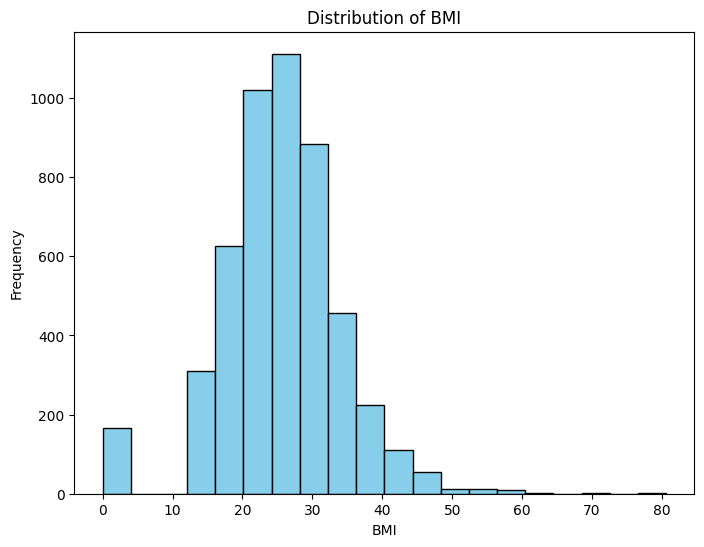

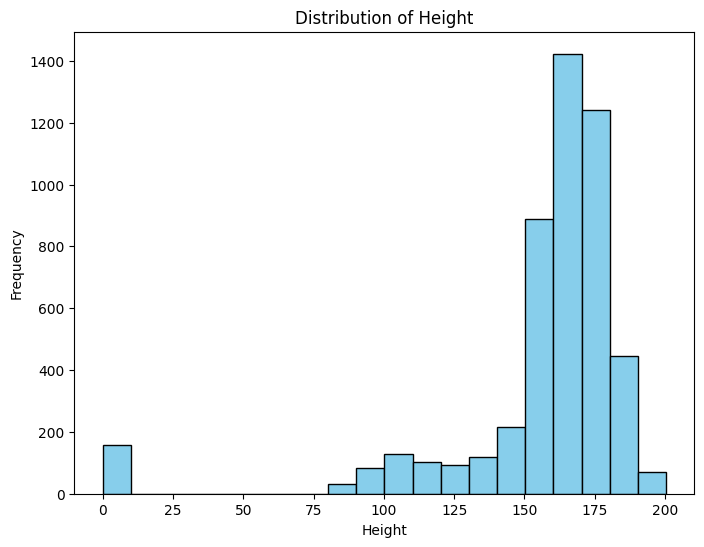

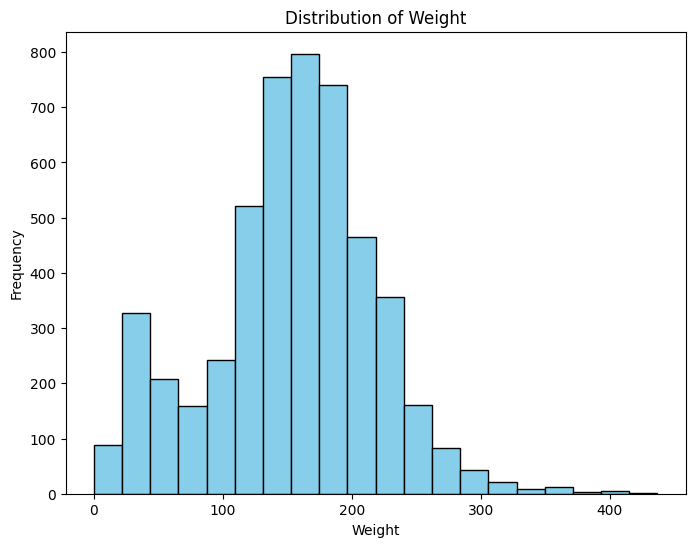

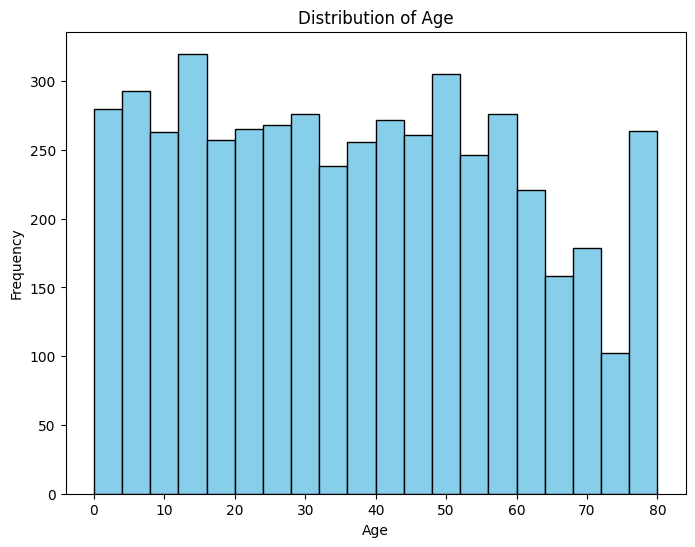

In [ ]:
for column in df_distribution.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df_distribution[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

In [ ]:
#Let's look at all the columns inthe dataframe
df.columns

Index(['id', 'Gender', 'Age', 'Race', 'MaritalStatus', 'RelationshipStatus',
       'Insured', 'Income', 'Poverty', 'HomeRooms', 'HomeOwn', 'Weight',
       'Height', 'BMI', 'Pulse', 'BPSys', 'BPDia', 'Testosterone', 'HDLChol',
       'TotChol', 'Diabetes', 'SleepHrsNight', 'PhysActive', 'PhysActiveDays',
       'AlcoholDay', 'AlcoholYear', 'SmokingStatus'],
      dtype='object')

In [ ]:
#What’s the mean 60-second pulse rate for all participants in the data? 73.63382
#In this case, I chose to use the df with NaN dropped, because having zero values would decrease the mean value incorrectly, as there are
#718 (more than 10%) NaN values in the column Pulse.
df_with_dropna_.Pulse.mean()


72.01647785787847

In [ ]:
#What’s the range of values for diastolic blood pressure in all participants? (Hint: see help for min(), max()). 0-116
#Again using the dataset with NaN dropped
df_with_dropna_.BPDia.min()

0.0

In [ ]:
df_with_dropna_.BPDia.max()

116.0

In [ ]:
df.Income.head(100)

,Income
0,100000.0
1,22500.0
2,70000.0
3,70000.0
4,12500.0
...,...
95,40000.0
96,40000.0
97,40000.0
98,22500.0


In [ ]:
#What’s the variance and standard deviation for income among all participants? Visualize the relationship between weight and height ?
#Using the dataset with 0 values, as less than 10%
print(df.Income.describe())
print(f"The variance of income is: {df.Income.var()}")
print(f"The standard deviation of income is: {df.Income.std()}")

count      5000.000000
mean      52774.000000
std       35554.855555
min           0.000000
25%       22500.000000
50%       50000.000000
75%       87500.000000
max      100000.000000
Name: Income, dtype: float64
The variance of income is: 1264147753.5507102
The standard deviation of income is: 35554.85555519401


In [ ]:
#Visualize the relationship between weight and height
stats.pearsonr(df.Weight, df.Height)

PearsonRResult(statistic=0.7097266620746369, pvalue=0.0)

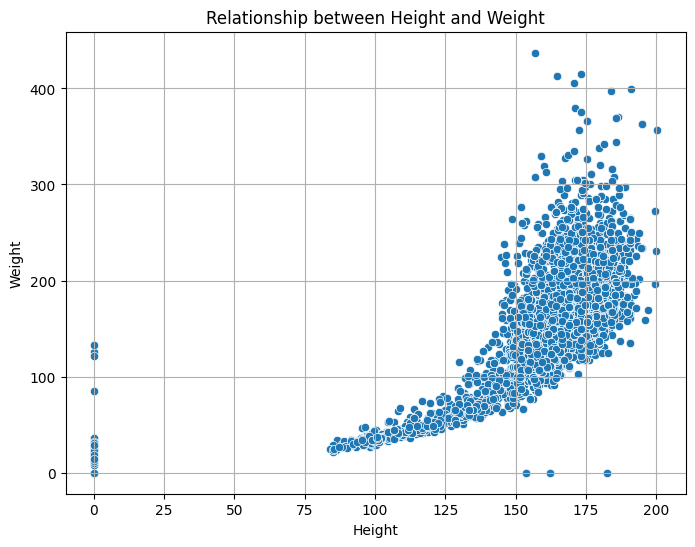

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Height', y='Weight', data=df)
plt.title('Relationship between Height and Weight')
plt.grid(True)
plt.show()

In [ ]:
#Color the points by gender diabetes smoking status


In [ ]:
#Conduct t-test between the following variables and make conclusions on the relationship between them based on P-Value

#Age and Gender
#BMI and Diabetes
#Alcohol Year and Relationship Status

In [ ]:
#Age and Gender

#Define the samples
df_age_gender = df[["Age", "Gender"]]
df_age_gender




,Age,Gender
0,14,male
1,43,female
2,80,male
3,80,male
4,5,male
...,...,...
4995,28,male
4996,0,female
4997,27,male
4998,60,male


In [ ]:
female = df_age_gender[df_age_gender["Gender"] == 'female']
male = df_age_gender[df_age_gender["Gender"] == 'male']
female

,Age,Gender
1,43,female
5,34,female
8,17,female
9,15,female
18,35,female
...,...,...
4986,60,female
4987,65,female
4991,66,female
4992,66,female


In [ ]:
#I first conduct an F-test and if the variance for age between the two groups is not statistically significant, I then use the independent t-test
# Calculate the sample variances
variance1 = np.var(female["Age"], ddof=1)
variance2 = np.var(male["Age"], ddof=1)

# Calculate the F-statistic
f_value = variance1 / variance2

# Calculate the degrees of freedom
df1 = len(female) - 1
df2 = len(male) - 1

# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)

# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)

Degree of freedom 1: 2494
Degree of freedom 2: 2504
F-statistic: 1.0601175639468423
p-value: 0.9277182685148574


In [ ]:
 #Perform an independent t-test
t_stat, p_value = stats.ttest_ind(female["Age"], male["Age"])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The difference in age between men and women is statistically significant.")
else:
    print("The difference in age between men and women is not statistically significant.")




T-statistic: 1.7498631109182003
P-value: 0.0802033026651036
The difference in age between men and women is not statistically significant.


In [ ]:
#BMI and Diabetes
#using the df with 0 values.

bmi_diabetes = df[["BMI", "Diabetes"]]
print(bmi_diabetes)

diabetes = bmi_diabetes[bmi_diabetes["Diabetes"] == "Yes"]
no_diabetes = bmi_diabetes[bmi_diabetes["Diabetes"] == "No"]
diabetes

       BMI Diabetes
0     17.3       No
1     33.3       No
2     33.9       No
3     33.9       No
4     16.7       No
...    ...      ...
4995  29.4       No
4996   0.0      0.0
4997  31.3       No
4998  27.5      Yes
4999  27.5      Yes

[5000 rows x 2 columns]


,BMI,Diabetes
31,43.4,Yes
32,43.4,Yes
33,43.4,Yes
37,45.2,Yes
49,41.7,Yes
...,...,...
4971,35.9,Yes
4982,29.3,Yes
4987,29.4,Yes
4998,27.5,Yes


In [ ]:
#I first conduct an F-test and if the variance for age between the two groups is not statistically significant, I then use the independent t-test
# Calculate the sample variances
variance1_ = np.var(diabetes["BMI"], ddof=1)
variance2_ = np.var(no_diabetes["BMI"], ddof=1)

# Calculate the F-statistic
f_value = variance1_ / variance2_

# Calculate the degrees of freedom
df1 = len(female) - 1
df2 = len(male) - 1

# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)

# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)

Degree of freedom 1: 2494
Degree of freedom 2: 2504
F-statistic: 1.2365286765721335
p-value: 0.999999942581372


In [ ]:
#Perform an independent t-test
t_stat, p_value = stats.ttest_ind(diabetes["BMI"], no_diabetes["BMI"])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The difference in BMI between people who have diabetes and people who do not have it is statistically significant.")
else:
    print("The difference in BMI between people who have diabetes and people who do not have it is not statistically significant.")

T-statistic: 15.222793772576695
P-value: 3.574381575402146e-51
The difference in BMI between people who have diabetes and people who do not have it is statistically significant.


In [ ]:
#Alcohol Year and Relationship Status
#here I use the sample with drop_NaN, do to the high proportion of null values.

alcohol_relationship = df_with_dropna_[["AlcoholYear", "RelationshipStatus"]]
alcohol_relationship

,AlcoholYear,RelationshipStatus
1,104.0,Single
5,104.0,Committed
10,260.0,Committed
12,260.0,Committed
17,52.0,Single
...,...,...
4976,4.0,Committed
4977,4.0,Committed
4982,12.0,Committed
4991,5.0,Single


In [ ]:
single = alcohol_relationship[alcohol_relationship["RelationshipStatus"] == "Single"]
committed = alcohol_relationship[alcohol_relationship["RelationshipStatus"] == "Committed"]
single

,AlcoholYear,RelationshipStatus
1,104.0,Single
17,52.0,Single
23,36.0,Single
95,104.0,Single
111,4.0,Single
...,...,...
4934,36.0,Single
4942,52.0,Single
4945,104.0,Single
4946,104.0,Single


In [ ]:
#I first conduct an F-test and if the variance for age between the two groups is not statistically significant, I then use the independent t-test
# Calculate the sample variances
variance1__ = np.var(single["AlcoholYear"], ddof=1)
variance2__ = np.var(single["AlcoholYear"], ddof=1)

# Calculate the F-statistic
f_value = variance1__ / variance2__

# Calculate the degrees of freedom
df1 = len(female) - 1
df2 = len(male) - 1

# Calculate the p-value
p_value = stats.f.cdf(f_value, df1, df2)

# Print the results
print('Degree of freedom 1:',df1)
print('Degree of freedom 2:',df2)
print("F-statistic:", f_value)
print("p-value:", p_value)

Degree of freedom 1: 2494
Degree of freedom 2: 2504
F-statistic: 1.0
p-value: 0.5000106455035049


In [ ]:
#Perform an independent t-test
t_stat, p_value = stats.ttest_ind(single["AlcoholYear"], committed["AlcoholYear"])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The difference in the number of year drinking alcohol between people who are single and committed is statistically significant.")
else:
    print("The difference in the number of year drinking alcohol between people who are single and committed is not statistically significant.")

T-statistic: -2.0051315511022936
P-value: 0.045226711137555865
The difference in the number of year drinking alcohol between people who are single and committed is statistically significant.


In [ ]:
# Scatter plot of weight vs height, colored by gender
fig = px.scatter(df, x='Height', y='Weight', color='Gender', title='Weight vs Height, colored by Gender')
print(fig.show())

# Scatter plot of weight vs height, colored by diabetes status
fig = px.scatter(df, x='Height', y='Weight', color='Diabetes', title='Weight vs Height, colored by Diabetes Status')
print(fig.show())

# Scatter plot of weight vs height, colored by smoking status (using the dropna dataset as the smokingstatus has more than 10% null values)
fig = px.scatter(df_with_dropna_, x='Height', y='Weight', color='SmokingStatus', title='Weight vs Height, colored by Smoking Status')
print(fig.show())

None


None


None
